<a href="https://colab.research.google.com/github/zidanesvinoza22/Tugas_ImageClassification/blob/main/presensi_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baiq Safira Vinili Kurnia\
1101184007\
TT-42-G6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Fungsi**

In [ ]:
''' 
Menghitung Nilai PathLoss (dB) dengan Parameter,
    f = Frekuensi (MHz)
    Tipe_Area = Tipe Area (urban, suburban, open)
    hT = Tinggi Pemancar (meter)
    hR = Tinggi User (meter)
    d = Jarak (meter)
'''
def cost(f,Tipe_Area,hT,hR,d):
    # Nilai Ca dan Cb untuk rentang frekuensi tertentu
    if f in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif f in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    # Nilai Cm untuk setiap Tipe Area
    if Tipe_Area == 'Urban' :
        Cm = 0
    elif Tipe_Area == 'Suburban' :
        Cm = -2*((np.log10((f/28)**2))-5.4)
    elif Tipe_Area == 'Open' :
        Cm = -4.78*(np.log10(f))+18.33*(np.log10(f))-40.94
    else :
        Cm = 'tipe salah'
    
    # Nilai variabel a dengan input Tinggi Penerima (hR) dan Frekuensi (f)
    a_hR = (1.1*np.log10(f)-0.7)*hR-(1.56*np.log10(f)-1.8)
    
    # Nilai Pathloss (dB)
    Lp = Ca+(Cb*np.log10(f))-(13.83*np.log(hT))-a_hR+((44.9-6.55*np.log10(hT))*np.log10(d))-Cm
    
    return Lp

# Konversi antara Numerik dan Logaritmik
def mW2dBm(x):
    return 10*np.log10(x)
def dBm2mW(x):
    return 10**(x/10)

# Menghitung Daya Terima (miliWatt)
def Prx(Ptx, PathLoss, Gtx, Grx):
    return dBm2mW(Ptx + Gtx + Grx - PathLoss)

# Menghitung Signal to Noise Ratio (SNR)
def SNR(Prx, BW):
    noise = -174 + mW2dBm(BW)
    return Prx/dBm2mW(noise)

# Menghitung Nilai Kapasitas (bps)
def Kapasitas(SNR, BW):
    return BW*np.log2(1+SNR)

**Parameter**

In [ ]:
# Nilai Jarak Pemancar dan Penerima dengan 200 User diantara 300-1000 m
d = np.random.randint(300,1000,200)
d = d[np.argsort(d)]

# 3 Nilai Frekuensi untuk dibandingkan (MHz)
f = [700,900,1800]

# Tipe Area
Tipe_Area = ["Urban","Suburban","Open"]

# Input Nilai Tinggi Pemancar (m)
hT = 80

# Input Nilai Tinggi Penerima (m)
hR = 1.5

# Nilai Daya Transmit (dBm)
Ptx = mW2dBm(30000)

# Nilai Gain Receiver dan Transmit (dB)
Gtx = 10
Grx = 2

# Bandwith (Hz)
BW = 5000000

**Grafik A ( Variasi Area )**

*   Frekuensi Sama ( 1800 MHz )
*   Area Berbeda ( Urban, Suburban, Open )




In [ ]:
# Menghitung Nilai PathLoss (dB), Daya Terima (milliWatt), SNR, dan Kapasitas untuk Grafik A
PathLoss_A = []
Prx_A = []
SNR_A = []
Kapasitas_A = []
for i in range(3) :
    PathLoss_A.append(cost(f[2],Tipe_Area[i],hT,hR,d))
    
    Prx_A.append(Prx(Ptx, PathLoss_A[i], Gtx, Grx))
    temp = Prx_A[i]
    Prx_A[i] = temp[np.argsort(d)]
    
    SNR_A.append(SNR(Prx_A[i], BW))
    temp = SNR_A[i]
    SNR_A[i] = temp[np.argsort(d)]

    Kapasitas_A.append(Kapasitas(SNR_A[i], BW))
    temp = Kapasitas_A[i]
    Kapasitas_A[i] = temp[np.argsort(d)]


**Grafik B ( Variasi Frekuensi )**
*   Frekuensi Berbeda ( 700, 900, 1800 MHz ) 
*   Area Sama ( Urban )



In [ ]:
# Menghitung Nilai PathLoss (dB), Daya Terima (milliWatt), SNR, dan Kapasitas untuk Grafik B
PathLoss_B = []
Prx_B = []
SNR_B = []
Kapasitas_B = []
for i in range(3) :
    PathLoss_B.append(cost(f[i],Tipe_Area[0],hT,hR,d))
    
    Prx_B.append(Prx(Ptx, PathLoss_B[i], Gtx, Grx))
    temp = Prx_B[i]
    Prx_B[i] = temp[np.argsort(d)]

    SNR_B.append(SNR(Prx_B[i], BW))
    temp = SNR_B[i]
    SNR_B[i] = temp[np.argsort(d)]

    Kapasitas_B.append(Kapasitas(SNR_B[i], BW))
    temp = Kapasitas_B[i]
    Kapasitas_B[i] = temp[np.argsort(d)]

**Menggambar Grafik**

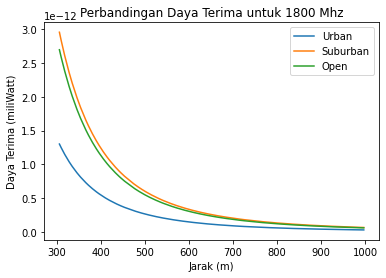

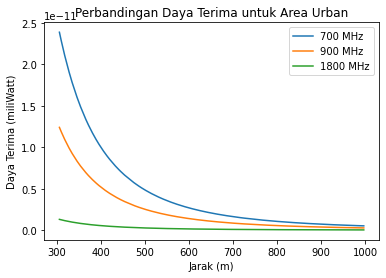

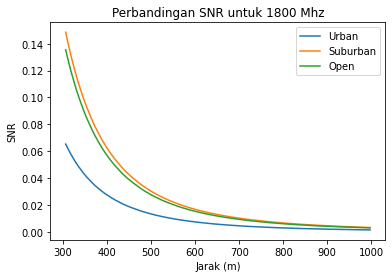

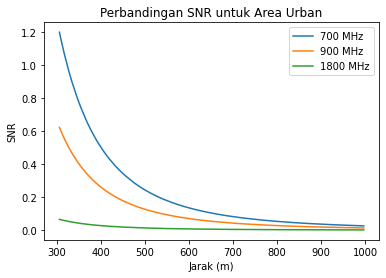

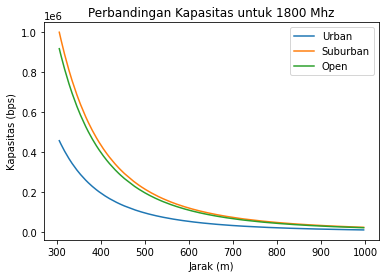

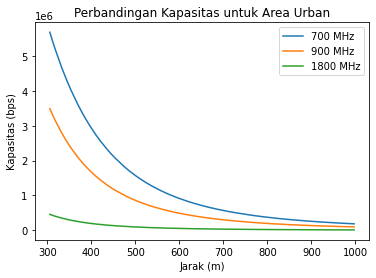

In [ ]:
Sumbu_Y = [Prx_A, Prx_B, SNR_A, SNR_B, Kapasitas_A, Kapasitas_B]
Titles = [
          "Perbandingan Daya Terima untuk 1800 Mhz",
          "Perbandingan Daya Terima untuk Area Urban",
          "Perbandingan SNR untuk 1800 Mhz",
          "Perbandingan SNR untuk Area Urban",
          "Perbandingan Kapasitas untuk 1800 Mhz",
          "Perbandingan Kapasitas untuk Area Urban"
          ]
Sumbu_Y_Satuan = [
                  "Daya Terima (miliWatt)", 
                  "Daya Terima (miliWatt)", 
                  "SNR", 
                  "SNR", 
                  "Kapasitas (bps)", 
                  "Kapasitas (bps)"
                  ]

for i in range(1, len(Sumbu_Y)+1) :
    if i%2 != 0 :
        plt.figure()
        plt.plot(d, Sumbu_Y[i-1][0], label="Urban")
        plt.plot(d, Sumbu_Y[i-1][1], label="Suburban")
        plt.plot(d, Sumbu_Y[i-1][2], label="Open")
        plt.legend()
        plt.title("{}".format(Titles[i-1]))
        plt.xlabel("Jarak (m)")
        plt.ylabel("{}".format(Sumbu_Y_Satuan[i-1]))
        plt.show()
    else :
        plt.figure()
        plt.plot(d, Sumbu_Y[i-1][0], label= "700 MHz")
        plt.plot(d, Sumbu_Y[i-1][1], label= "900 MHz")
        plt.plot(d, Sumbu_Y[i-1][2], label= "1800 MHz")
        plt.legend()
        plt.title("{}".format(Titles[i-1]))
        plt.xlabel("Jarak (m)")
        plt.ylabel("{}".format(Sumbu_Y_Satuan[i-1]))
        plt.show()